# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [2]:
N = 22
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
col

'Sleep_Hours'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')
series = df[col].dropna().astype(float)
series.name = col
len(series)
series


0       6.1
1       6.5
2       5.5
3       3.9
4       6.7
       ... 
2995    6.4
2996    7.3
2997    6.5
2998    7.5
2999    6.9
Name: Sleep_Hours, Length: 3000, dtype: float64

# I. Числовые характеристики

In [4]:

mean = series.mean()
var = series.var()
mode_vals = series.mode()
mode_val = mode_vals.iloc[0] if not mode_vals.empty else np.nan
median = series.median()
q25, q50, q75 = series.quantile([0.25, 0.5, 0.75])
skew = stats.skew(series, bias=False)
kurt = stats.kurtosis(series, fisher=True, bias=False)
iqr = q75 - q25
{
    'Среднее': float(mean),
    'Дисперсия': float(var),
    'Мода': float(mode_val),
    'Медиана': float(median),
    'Квантили': {'0.25': q25, '0.5': q50, '0.75': q75},
    'Асимметрия': float(skew),
    'Эксцесс': float(kurt),
    'IQR': iqr,
}


{'Среднее': 6.489766666666668,
 'Дисперсия': 2.2222260208958544,
 'Мода': 6.1,
 'Медиана': 6.5,
 'Квантили': {'0.25': 5.5, '0.5': 6.5, '0.75': 7.5},
 'Асимметрия': 0.011854250604519176,
 'Эксцесс': -0.2954414857948535,
 'IQR': 2.0}

# I. Гистограмма и ЭФР

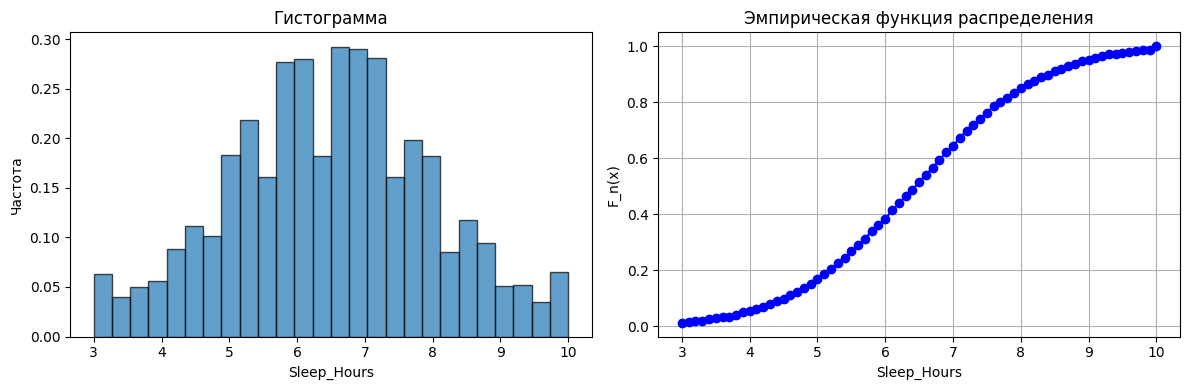

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Гистограмма
axes[0].hist(series, bins='auto', alpha=0.7, color='tab:blue', edgecolor='black',density=True)
axes[0].set_title(f'Гистограмма')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Частота')


ecdf = series.value_counts().sort_index().cumsum()  # Считаем кумулятивную сумму
ecdf = ecdf / ecdf.max() 

# График ЭФР
axes[1].plot(ecdf.index, ecdf.values, marker='o', linestyle='-', color='b')
axes[1].set_title('Эмпирическая функция распределения')
axes[1].set_xlabel(col)
axes[1].set_ylabel('F_n(x)')
plt.tight_layout()
plt.grid(True)
plt.show()



### Вывод:
#### Распределение близко к нормальному. Также как и нормальное, оно симметричное, поскольку асимметрия близка к 0. По гистограмме и эксцессу можно видеть, что распределение слегка более плоское, чем нормальное. Также можно сделать предположение, что распределение нельзя считать нормальным, поскольку видны сильные выбросы.

# II. Нормальность данных

In [16]:

def chi_square_test_normal(data: pd.Series):
    data = data.values
    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=1)

    k = int(np.floor(1 + np.log2(n)))  # правило Стерджеса

    hist, edges = np.histogram(data, bins=k)
    O = hist                            # наблюдаемые частоты

   
    cdf_vals = stats.norm.cdf(edges, loc=mu, scale=sigma)  # ожидаемые частоты
    probs = np.diff(cdf_vals)        
    E = n * probs                   

   
    chi2_stat = np.sum((O - E) ** 2 / E)

    df = k - 2 - 1  

    # Критическое значение со значимостью 0.05
    chi2_crit = stats.chi2.ppf(0.95,df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    k2_stat, p_k2 = stats.normaltest(series, nan_policy='omit')

    return float(chi2_stat), df, float(chi2_crit), float(p_value), float(k2_stat), float(p_k2)


  

chi2_stat, df_chi2, chi2_crit, p_value, k2_stat, p_k2  = chi_square_test_normal(series)

{
        'χ² статистика': chi2_stat,
        'Степени свободы': df_chi2,
        'Критическое значение': chi2_crit,
        'p-value': p_value,
        'Вывод': 'Принимаем H0 (нормальное)' if chi2_stat < chi2_crit else 'Отклоняем H0',
        'K² статистика': k2_stat,
        'p_value': p_k2,
        'Вывод по K²': 'Принимаем H0 (нормальное)' if p_k2 > 0.05 else 'Отклоняем H0'
}


{'χ² статистика': 72.05670214949038,
 'Степени свободы': 9,
 'Критическое значение': 16.918977604620448,
 'p-value': 6.008082920061497e-12,
 'Вывод': 'Отклоняем H0',
 'K² статистика': 14.961370263400562,
 'p_value': 0.000563870957332659,
 'Вывод по K²': 'Отклоняем H0'}

# II. Q-Q plot

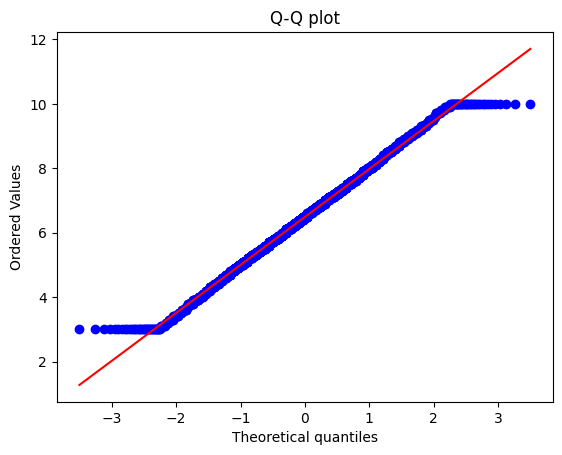

In [7]:

import scipy.stats as stats

stats.probplot(series, dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()


### Вывод:
#### По критериям распределение не является нормальным, график Q-Q plot показывет, что распределение более плоское, чем нормальное. Хвосты не совпадают с графиком, поэтому распределение отклоняется от нормального

# III. Обработка данных

In [ ]:

from sklearn.preprocessing import StandardScaler

# Усечение выбросов
def remove_outliers_iqr(s: pd.Series, factor: float = 1.5) -> pd.Series:
    q1, q3 = s.quantile([0.1, 0.9])
    iqr = q3 - q1
    series_clipped = series.clip(lower=q1 - factor*iqr, upper=q3 + factor*iqr)
    return series_clipped

series_iqr = remove_outliers_iqr(series)

# Стандартизация
scaler_std = StandardScaler()
series_standardized = pd.Series(
    scaler_std.fit_transform(series_iqr.values.reshape(-1, 1)).flatten(),
    index=series_iqr.index,
    name=series.name
)

# Логарифмирование
series_log = pd.Series(
    np.log(series_iqr + 1),
    index=series_iqr.index,
    name=series.name
)

len(series_standardized), len(series_iqr), len(series_log)


(3000, 3000, 3000)

In [18]:

def describe_and_test(s: pd.Series):
    s = s.dropna().astype(float)
    mean = s.mean()
    var = s.var()
    mode_vals = s.mode()
    mode_val = mode_vals.iloc[0] if not mode_vals.empty else np.nan
    median = s.median()
    q25, q50, q75 = s.quantile([0.25, 0.5, 0.75])
    skew = stats.skew(s, bias=False)
    kurt = stats.kurtosis(s, fisher=True, bias=False)
    iqr = q75 - q25
    chi2_stat, df_chi2, _, p_chi2, k2_stat, p_k2 = chi_square_test_normal(s)
    return {
        'Среднее': float(mean), 'Дисперсия': float(var), 'Мода': float(mode_val), 'Медиана': float(median),
        'Квантили': {'0.25': q25, '0.5': q50, '0.75': q75},
        'Асимметрия': float(skew), 'Эксцесс': float(kurt), 'IQR': iqr,
        'χ² статистика': {'Значение': chi2_stat, 'Степени свободны': df_chi2, 'p_value': p_chi2},
        'K² статистика': {'Значение': k2_stat, 'p_value': p_k2}
    }

results_stand = describe_and_test(series_standardized)
results_iqr = describe_and_test(series_iqr)
results_log = describe_and_test(series_log)
results_stand, results_iqr, results_log


({'Среднее': -9.106789396658618e-16,
  'Дисперсия': 1.0003334444814937,
  'Мода': -0.2615067932343192,
  'Медиана': 0.006865867230216801,
  'Квантили': {'0.25': -0.6640657839311225,
   '0.5': 0.006865867230216801,
   '0.75': 0.6777975183915561},
  'Асимметрия': 0.011854250604521865,
  'Эксцесс': -0.2954414857948544,
  'IQR': 1.3418633023226785,
  'χ² статистика': {'Значение': 66.8626516994374,
   'Степени свободны': 9,
   'p_value': 6.256051232611526e-11},
  'K² статистика': {'Значение': 14.961370263400562,
   'p_value': 0.000563870957332659}},
 {'Среднее': 6.489766666666668,
  'Дисперсия': 2.2222260208958544,
  'Мода': 6.1,
  'Медиана': 6.5,
  'Квантили': {'0.25': 5.5, '0.5': 6.5, '0.75': 7.5},
  'Асимметрия': 0.011854250604519176,
  'Эксцесс': -0.2954414857948535,
  'IQR': 2.0,
  'χ² статистика': {'Значение': 72.05670214949038,
   'Степени свободны': 9,
   'p_value': 6.008082920061497e-12},
  'K² статистика': {'Значение': 14.961370263400562,
   'p_value': 0.000563870957332659}},
 {'С

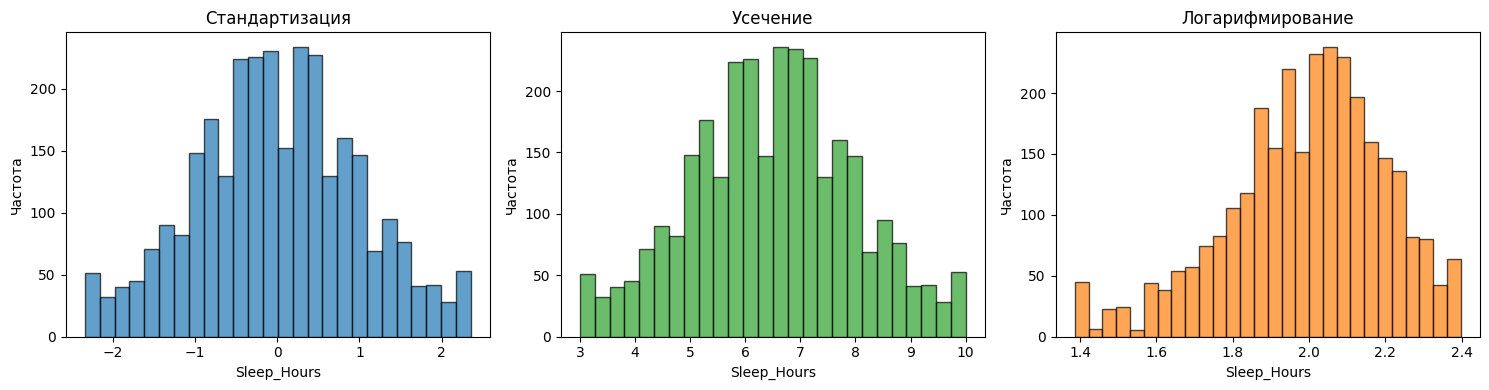

In [19]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(series_standardized, bins='auto', alpha=0.7, color='tab:blue', edgecolor='black')
axes[0].set_title('Стандартизация')
axes[1].hist(series_iqr, bins='auto', alpha=0.7, color='tab:green', edgecolor='black')
axes[1].set_title('Усечение')
axes[2].hist(series_log, bins='auto', alpha=0.7, color='tab:orange', edgecolor='black')
axes[2].set_title('Логарифмирование')
for ax in axes:
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')
plt.tight_layout()
plt.show()


### Вывод:
#### Добиться нормального распределения не удалось. Логарифмирование добавило значительной асимметрии в распределение

# IV. Группировка данных по столбцу 'School_Grade'. 

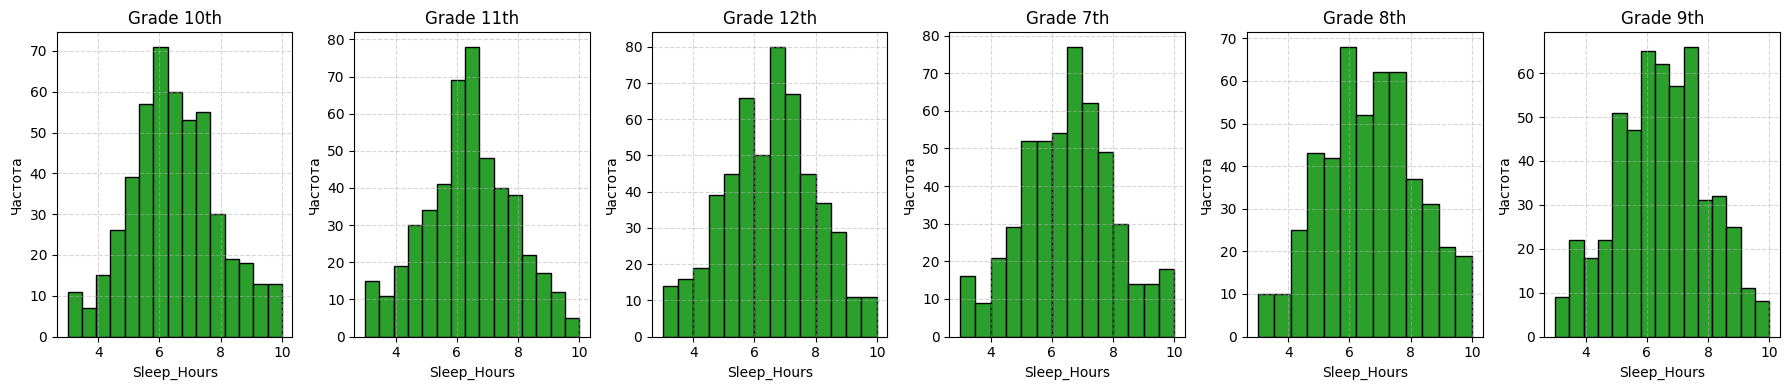

                  mean       var
School_Grade                    
10th          6.488296  2.102064
11th          6.367432  2.113079
12th          6.459735  2.201804
7th           6.483702  2.287617
8th           6.675311  2.406853
9th           6.468441  2.196945


In [22]:
groups = df.groupby('School_Grade')
n_groups = len(groups)

fig, axes = plt.subplots(1, n_groups, figsize=(3*n_groups,4), sharex=True)

for ax, (name, group) in zip(axes, groups):
    ax.hist(group[col].dropna(), bins='auto', color='tab:green', edgecolor='black')
    ax.set_title(f'Grade {name}')
    ax.set_ylabel('Частота')
    ax.set_xlabel(col)
    ax.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

stats_per_group = groups[col].agg(['mean', 'var'])
print(stats_per_group)

### Вывод:
#### В некоторых группах заметны сильные выбросы, например в группе с 11 и 9 классом. Можно сказать, что у всех групп распределение близко к нормальному, однако гипотизу о нормальном распределении принять нельзя. 